# NLP Project

In [1]:
!pip install -r ../requirements.txt

  Using cached SQLAlchemy-1.4.37-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
  Using cached pandas-1.4.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached python_dotenv-0.20.0-py3-none-any.whl (17 kB)
  Using cached psycopg2_binary-2.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached numpy-1.23.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached ipyleaflet-0.17.0-py2.py3-none-any.whl (3.3 MB)
  Using cached sympy-1.10.1-py3-none-any.whl (6.4 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached greenlet-1.1.2

In [2]:
import pandas as pd
import pickle
import numpy as np
import re
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Step 1:

Load your dataset and do the necessary transformations on your target variable.

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"

df_raw = pd.read_csv(url)

In [3]:
df_raw.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [4]:
df_raw.tail()

,url,is_spam
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False
2998,https://www.bbc.com/news/technology-51018758,False


In [5]:
df_raw.sample(5, random_state=11)

,url,is_spam
903,https://www.cnn.com/2020/06/24/tech/olympus-ca...,False
601,https://join1440.com/,True
2837,https://numlock.substack.com/p/numlock-sunday-...,True
489,https://shop.morningbrew.com/,True
2407,https://www.bloomberg.com/tosv2.html,True


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


<AxesSubplot:>

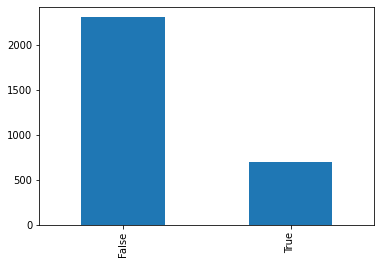

In [7]:
df_raw['is_spam'].value_counts().plot.bar()

In [8]:
df = df_raw.copy()

In [9]:
df.duplicated().any()

True

In [10]:
#Remove duplicates
df = df.drop_duplicates().reset_index(drop = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2369 non-null   object
 1   is_spam  2369 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 20.9+ KB


In [12]:
#Encode

df['is_spam'] = df['is_spam'].apply(lambda x: 1 if x == True else 0)
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


## Step 2:

Use NLP techniques to preprocess the data. 

In [13]:


def no_alpha(text): #remove non-alphanumeric characters
    return re.sub("(\\d|\\W)+"," ",text)

def tags(text): #remove tags
    return re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

def punct(text):#remove punctuation
    return re.sub('[^a-zA-Z]', ' ', text)

def url(text): #remove start of url
    return re.sub(r'(https://www|https://)', '', text)



In [14]:
df['clean_url'] = df['url'].apply(url).apply(no_alpha).apply(tags).apply(punct)

In [15]:
df.head()

,url,is_spam,clean_url
0,https://briefingday.us8.list-manage.com/unsubs...,1,briefingday us list manage com unsubscribe
1,https://www.hvper.com/,1,hvper com
2,https://briefingday.com/m/v4n3i4f3,1,briefingday com m v n i f
3,https://briefingday.com/n/20200618/m#commentform,0,briefingday com n m commentform
4,https://briefingday.com/fan,1,briefingday com fan


## Step 3:

Use Support Vector machine to build a url spam classifier.

In [16]:
X = df['clean_url']
y = df['is_spam']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=15, stratify=y)

In [18]:
vec = CountVectorizer(stop_words='english')
X_train = vec.fit_transform(X_train).toarray()
X_test=vec.transform(X_test).toarray()

In [20]:
classifier = SVC(C = 1.0, kernel = 'linear', gamma = 'auto')

In [21]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       532
           1       0.76      0.61      0.67        61

    accuracy                           0.94       593
   macro avg       0.86      0.79      0.82       593
weighted avg       0.94      0.94      0.94       593



### Hypertune

In [22]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(random_state=1234),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.7s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   4.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   4.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   4.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   4.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.3s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.6s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=  10.3s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=  10.5s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.6s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.3s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.3s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.7s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   5.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END ...................

GridSearchCV(estimator=SVC(random_state=1234),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [26]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [33]:
classifier = SVC(C=10, gamma= 0.1, kernel='rbf')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       532
           1       0.73      0.66      0.69        61

    accuracy                           0.94       593
   macro avg       0.84      0.81      0.83       593
weighted avg       0.94      0.94      0.94       593

